<a href="https://colab.research.google.com/github/liuchentue/SVM-based-human-detection/blob/main/Faster_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install dependencies: 
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 703.8MB 24kB/s 
     |████████████████████████████████| 6.6MB 2.0MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101
     |████████████████████████████████| 276kB 13.9MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44075 sha256=0ae4e407dabf163dd21ee31abd0f58390af8208aaf854846e4c764d2451c8a13
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip

In [2]:
# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import cv2

# get image
!wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg
im = cv2.imread("./input.jpg")

# Create config
cfg = get_cfg()
cfg.merge_from_file("/usr/local/lib/python3.6/dist-packages/detectron2/model_zoo/configs/COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl"

# Create predictor
predictor = DefaultPredictor(cfg)

# Make prediction
outputs = predictor(im)

--2020-12-05 01:08:49--  http://images.cocodataset.org/val2017/000000439715.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.2.4
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.2.4|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209222 (204K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>] 204.32K  --.-KB/s    in 0.01s   

2020-12-05 01:08:49 (15.3 MB/s) - ‘input.jpg’ saved [209222/209222]



model_final_f6e8b1.pkl: 243MB [00:10, 22.2MB/s]                           


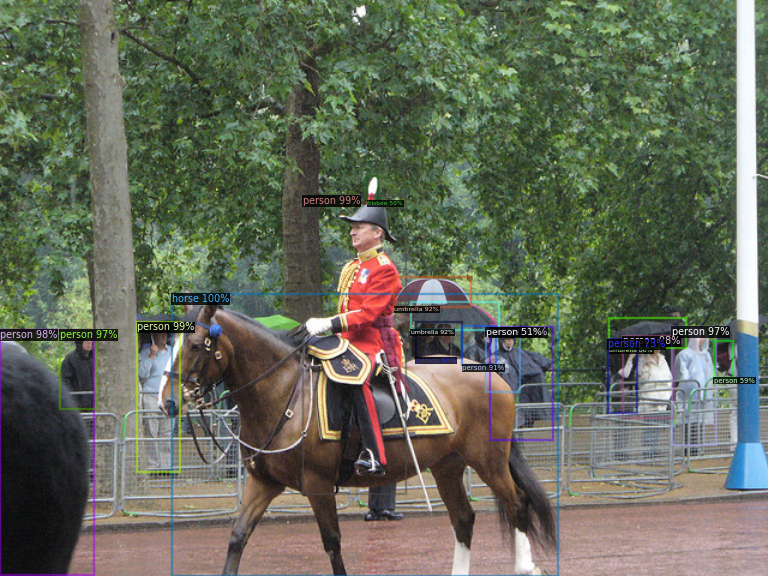

In [3]:
from google.colab.patches import cv2_imshow
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])


In [37]:
#Function for counting the number of people present in the image
def CountPerson(img):
  # Create predictor
  predictor = DefaultPredictor(cfg)
  # Make prediction
  outputs = predictor(img)
  inst=outputs["instances"]
  #extract the information from the predictor outputs
  classes=inst.get("pred_classes")
  precision=inst.get("scores")
  locations=inst.get("pred_boxes")
  #classes: what type of object is detected (for example, 0 for person; 25 for umbrella; 17 for horse) (based on COCO dataset)
  #locations: the boxes locations of the detected objects (in our case, there are 17 boxes in the example photo)
  #precision: the probability of the corresponding object classification to be accurate
  classes=tf.make_ndarray(tf.make_tensor_proto(classes.cpu())) 
  precision=tf.make_ndarray(tf.make_tensor_proto(precision.cpu())) 
  locations=tf.make_ndarray(tf.make_tensor_proto(locations.tensor.cpu()))
  numofperson=0
  for i in range(len(classes)):
    if (classes[i]==0):
      numofperson=numofperson+1
  print("Number of people in the picture:",numofperson)


#Example showing how to use this function with the sample image
CountPerson(im)

Number of people in the picture: 12


In [35]:
 #Function for extracting the person boxes out from the image using the Faster RCNN
 def Identifyperson(img, personlist): 
  # Create predictor
  predictor = DefaultPredictor(cfg)
  # Make prediction
  outputs = predictor(img)
  inst=outputs["instances"]
  #extract the information from the predictor outputs
  classes=inst.get("pred_classes")
  precision=inst.get("scores")
  locations=inst.get("pred_boxes")
  #classes: what type of object is detected (for example, 0 for person; 25 for umbrella; 17 for horse) (based on COCO dataset)
  #locations: the boxes locations of the detected objects (in our case, there are 17 boxes in the example photo)
  #precision: the probability of the corresponding object classification to be accurate
  classes=tf.make_ndarray(tf.make_tensor_proto(classes.cpu())) 
  precision=tf.make_ndarray(tf.make_tensor_proto(precision.cpu())) 
  locations=tf.make_ndarray(tf.make_tensor_proto(locations.tensor.cpu()))
  #append the boxes that are predicted to be person into the output list
  for i in range (len(classes)):
    if(classes[i]==0):
      personlist.append(locations[i])


#Example showing how to use this function with the sample image
personboxes=[]
Identifyperson(im,personboxes)
print(personboxes)

[array([114.41254, 269.07986, 149.62126, 393.16165], dtype=float32), array([252.46843, 163.97241, 338.19638, 412.05786], dtype=float32), array([1.06968835e-01, 2.75446442e+02, 7.84416046e+01, 4.78835968e+02],
      dtype=float32), array([519.2927 , 280.65097, 561.2585 , 348.39725], dtype=float32), array([560.0555 , 272.97702, 596.37415, 370.65198], dtype=float32), array([ 49.830788, 275.4489  ,  79.59489 , 341.22552 ], dtype=float32), array([385.2857 , 272.19095, 413.52267, 304.7111 ], dtype=float32), array([346.30725, 268.99423, 385.01465, 298.49142], dtype=float32), array([407.96832, 273.1889 , 460.71155, 366.98227], dtype=float32), array([506.72928, 283.14194, 530.46857, 344.71362], dtype=float32), array([595.0448 , 284.67865, 611.1805 , 315.11865], dtype=float32), array([404.87195, 273.4978 , 433.1209 , 327.21487], dtype=float32)]


(124, 35, 3)
(249, 86, 3)
(203, 78, 3)
(68, 42, 3)
(98, 36, 3)
(66, 30, 3)


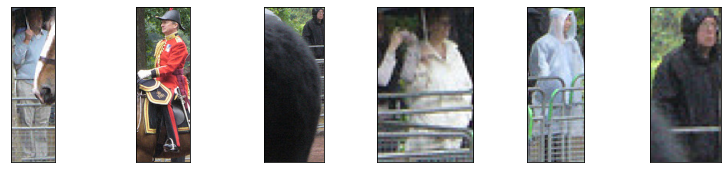

In [36]:
#functions for cropping the person boxes as indicated by the locations and display them
import matplotlib.pyplot as plt
def plot_gallery(images, h, w, n_row=1,n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB))
        print(np.shape(images[i]))
        plt.xticks(())
        plt.yticks(())

def cropboxes(testim, bx,personset):
  for i in range(len(bx)):
    bxi=bx[i]
    y1=int(bxi[0])
    y2=int(bxi[2])
    x1=int(bxi[1])
    x2=int(bxi[3])
    personi=testim[x1:x2,y1:y2]
    personset.append(personi)
  plot_gallery(personset,100,30)  


#showing an example of cropping using the sample image
personimgs= []
cropboxes(im,personboxes,personimgs)    



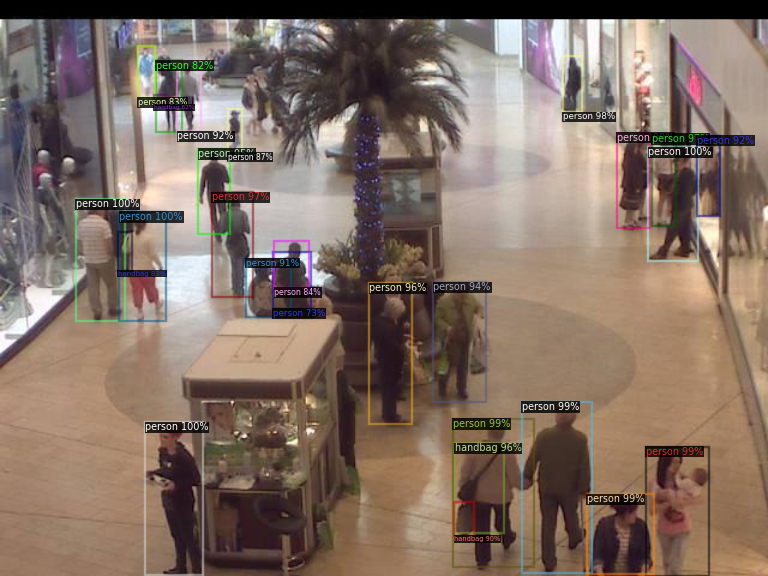

In [ ]:
img0001 = cv2.imread("/seq_000001.jpg")



# Make prediction
outputs = predictor(img0001)

v = Visualizer(img0001[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])